# A summary of concepts in Infomap implementation:

##### Levels:
The hierarchical approach of Infomap enables you to see the network's structure at different levels of detail. Level 1 is the finest-grained partition, where individual nodes or small clusters are considered as communities. As you move to higher levels, the algorithm aggregates smaller communities into larger ones, revealing more general groupings in the data. Each level provides a different perspective on the community structure and highlights different organizational patterns.

##### Top Modules:
At the highest level of the hierarchy, the top modules are the most inclusive clusters of nodes. These clusters can represent overarching themes, categories, or functional groups in the network. The division of the network into top modules provides a macroscopic view of the network's organization.

##### Codelength:
Infomap optimizes the codelength by minimizing the description length of the network's structure and community assignments. In essence, the codelength measures how well the algorithm has captured the relationships between nodes by grouping them into communities. Lower codelength indicates that the discovered community structure efficiently represents the network's structure in terms of modular organization. A lower codelength indicates a more efficient representation of the network. The goal of Infomap is to find a community structure that minimizes the codelength.



In [187]:
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt 


In [188]:
filepath = '/Users/melikakeshavarz/Desktop/INFO/kato_et_al_1990.xls'
sheets = ['matr','pla+pol','pla','pol']
sheet = sheets[0]
dataframe = pd.read_excel(filepath, sheet_name = sheet, header = [0,1,2])
dataframe

Unnamed: 0_level_0 plant_ge      Acer  \
                               Unnamed: 0_level_1 plant_sp rufinerve   
                                        pol_ge_sp      no.         1   
0                       ACHILIDAE1 (Ach. : Hem. )       53         0   
1    Acteniceromorphus nipponensis (Ela. : Col. )      398         0   
2                 Actina jezoensis (Str. : Dip. )      139         0   
3        Adelphocoris triannulatus (Mir. : Hem. )       28         0   
4                      AGALLIIDAE1 (Aga. : Hem. )       47         0   
..                                            ...      ...       ...   
674                      LUSIIDAE1 (Clu. : Dip. )      675         0   
675          Lasioglossum (El.) aff (Hal. : Hym )      676         0   
676                 Camponotus sp. (For. : Hym. )      677         0   
677                    Andrena sp. (And. : Hym. )      678         0   
678                    Ceratina sp. (Ant. : Hym.)      679         0   

    Adenocaulon  Aesculus Agrimonia  Ainsliaea      Alangium       Ampelopsis  \
     himalaicum turbinata    pilosa acerifolia platanifolium brevipedunculata   
              2         3         4          5             6                7   
0             0         0         0          0             0                0   
1             0         0         0          0             0                0   
2             0         0         0          0             0                0   
3             0         0         0          0             0                0   
4             0         0         0          0             0                0   
..          ...       ...       ...        ...           ...              ...   
674           0         0         0          0             0                0   
675           0         0         0          0             0                0   
676           0         0         0          0             0                0   
677           0         0         0          0             0                0   
678           0         0         0          0             0                0   

     Anemone  ... Tripterospermum Viburnum      Viola                     \
    flaccida  ...       japonicum plicatum grypoceras kusanoana vaginata   
           8  ...              84       85         86        87       88   
0          0  ...               0        0          0         0        0   
1          0  ...               0        0          0         0        0   
2          0  ...               0        0          0         0        0   
3          0  ...               0        0          0         0        0   
4          0  ...               0        0          0         0        0   
..       ...  ...             ...      ...        ...       ...      ...   
674        0  ...               0        0          0         0        0   
675        0  ...               0        0          0         0        0   
676        0  ...               0        0          0         0        0   
677        0  ...               0        0          0         0        0   
678        0  ...               0        0          0         0        0   

                Weigela      Cornus       Caryopteris   
    verecunda hortensis controversa kousa   divaricata  
           89        90          91    92           93  
0           0         0           0     0            0  
1           0         0           0     0            0  
2           0         0           0     0            0  
3           0         0           0     0            0  
4           0         0           0     0            0  
..        ...       ...         ...   ...          ...  
674         0         0           0     0            0  
675         0         0           0     0            0  
676         0         0           0     0            0  
677         0         0           0     0            0  
678         0         0           0     0            0  

[679 rows x 95 columns]

In [190]:
plant_genus   = dataframe.columns.get_level_values(0)[2::]
plant_species = dataframe.columns.get_level_values(1)[2::]
plant_numbers = dataframe.columns.get_level_values(0)[3::]
plant_species

Index(['rufinerve', 'himalaicum', 'turbinata', 'pilosa', 'acerifolia',
       'platanifolium', 'brevipedunculata', 'flaccida', 'polymorpha',
       'pubescens', 'filiforme', 'aemula', 'dioicus', 'glehni', 'thunbergii',
       'japonica', 'kousa', 'tenuicaulis', 'delphiniifolia', 'alternifolia',
       'divaricatum', 'crenata', 'japonicum', 'kagamontanum', 'micranthum',
       'communis', 'lineariloba', 'pallida', 'japonica', 'podocarpum',
       'crenata', 'sessile', 'grandiflorum', 'alatus', 'sieboldianus',
       'nepalense', 'japonicum', 'tomentella', 'hirta', 'macrophylla',
       'paniculata', 'noli-tangere', 'textori', 'dentata', 'yomena', 'bicolor',
       'obtusifolium', 'clethroides', 'salicifolia', 'griffithii', 'villosa',
       'aestiva', 'pubescens', 'senticosa', 'thunbergii', 'japonicus',
       'amurense', 'asiatica', 'macranthum', 'Grayana', 'incisa', 'salicina',
       'longituba', 'trichocarpa', 'japonica', 'javanica', 'trichocarpa',
       'multiflora', 'illecebrosus

# creating a connection matrix:

df0 is the connection matrix with names being the indeces.

In [192]:
df = dataframe.copy()
df

Unnamed: 0_level_0 plant_ge      Acer  \
                               Unnamed: 0_level_1 plant_sp rufinerve   
                                        pol_ge_sp      no.         1   
0                       ACHILIDAE1 (Ach. : Hem. )       53         0   
1    Acteniceromorphus nipponensis (Ela. : Col. )      398         0   
2                 Actina jezoensis (Str. : Dip. )      139         0   
3        Adelphocoris triannulatus (Mir. : Hem. )       28         0   
4                      AGALLIIDAE1 (Aga. : Hem. )       47         0   
..                                            ...      ...       ...   
674                      LUSIIDAE1 (Clu. : Dip. )      675         0   
675          Lasioglossum (El.) aff (Hal. : Hym )      676         0   
676                 Camponotus sp. (For. : Hym. )      677         0   
677                    Andrena sp. (And. : Hym. )      678         0   
678                    Ceratina sp. (Ant. : Hym.)      679         0   

    Adenocaulon  Aesculus Agrimonia  Ainsliaea      Alangium       Ampelopsis  \
     himalaicum turbinata    pilosa acerifolia platanifolium brevipedunculata   
              2         3         4          5             6                7   
0             0         0         0          0             0                0   
1             0         0         0          0             0                0   
2             0         0         0          0             0                0   
3             0         0         0          0             0                0   
4             0         0         0          0             0                0   
..          ...       ...       ...        ...           ...              ...   
674           0         0         0          0             0                0   
675           0         0         0          0             0                0   
676           0         0         0          0             0                0   
677           0         0         0          0             0                0   
678           0         0         0          0             0                0   

     Anemone  ... Tripterospermum Viburnum      Viola                     \
    flaccida  ...       japonicum plicatum grypoceras kusanoana vaginata   
           8  ...              84       85         86        87       88   
0          0  ...               0        0          0         0        0   
1          0  ...               0        0          0         0        0   
2          0  ...               0        0          0         0        0   
3          0  ...               0        0          0         0        0   
4          0  ...               0        0          0         0        0   
..       ...  ...             ...      ...        ...       ...      ...   
674        0  ...               0        0          0         0        0   
675        0  ...               0        0          0         0        0   
676        0  ...               0        0          0         0        0   
677        0  ...               0        0          0         0        0   
678        0  ...               0        0          0         0        0   

                Weigela      Cornus       Caryopteris   
    verecunda hortensis controversa kousa   divaricata  
           89        90          91    92           93  
0           0         0           0     0            0  
1           0         0           0     0            0  
2           0         0           0     0            0  
3           0         0           0     0            0  
4           0         0           0     0            0  
..        ...       ...         ...   ...          ...  
674         0         0           0     0            0  
675         0         0           0     0            0  
676         0         0           0     0            0  
677         0         0           0     0            0  
678         0         0           0     0            0  

[679 rows x 95 columns]

In [193]:
df.columns = ['pollenators', 'no.']+list(plant_species)
poll_num = df['no.'] 
df0=df.drop(columns='no.')

poll_species = df0['pollenators']
df0=df0.set_index('pollenators')
df0


rufinerve  himalaicum  \
pollenators                                                           
ACHILIDAE1 (Ach. : Hem. )                             0           0   
Acteniceromorphus nipponensis (Ela. : Col. )          0           0   
Actina jezoensis (Str. : Dip. )                       0           0   
Adelphocoris triannulatus (Mir. : Hem. )              0           0   
AGALLIIDAE1 (Aga. : Hem. )                            0           0   
...                                                 ...         ...   
LUSIIDAE1 (Clu. : Dip. )                              0           0   
Lasioglossum (El.) aff (Hal. : Hym )                  0           0   
Camponotus sp. (For. : Hym. )                         0           0   
Andrena sp. (And. : Hym. )                            0           0   
Ceratina sp. (Ant. : Hym.)                            0           0   

                                              turbinata  pilosa  acerifolia  \
pollenators                                                                   
ACHILIDAE1 (Ach. : Hem. )                             0       0           0   
Acteniceromorphus nipponensis (Ela. : Col. )          0       0           0   
Actina jezoensis (Str. : Dip. )                       0       0           0   
Adelphocoris triannulatus (Mir. : Hem. )              0       0           0   
AGALLIIDAE1 (Aga. : Hem. )                            0       0           0   
...                                                 ...     ...         ...   
LUSIIDAE1 (Clu. : Dip. )                              0       0           0   
Lasioglossum (El.) aff (Hal. : Hym )                  0       0           0   
Camponotus sp. (For. : Hym. )                         0       0           0   
Andrena sp. (And. : Hym. )                            0       0           0   
Ceratina sp. (Ant. : Hym.)                            0       0           0   

                                              platanifolium  brevipedunculata  \
pollenators                                                                     
ACHILIDAE1 (Ach. : Hem. )                                 0                 0   
Acteniceromorphus nipponensis (Ela. : Col. )              0                 0   
Actina jezoensis (Str. : Dip. )                           0                 0   
Adelphocoris triannulatus (Mir. : Hem. )                  0                 0   
AGALLIIDAE1 (Aga. : Hem. )                                0                 0   
...                                                     ...               ...   
LUSIIDAE1 (Clu. : Dip. )                                  0                 0   
Lasioglossum (El.) aff (Hal. : Hym )                      0                 0   
Camponotus sp. (For. : Hym. )                             0                 0   
Andrena sp. (And. : Hym. )                                0                 0   
Ceratina sp. (Ant. : Hym.)                                0                 0   

                                              flaccida  polymorpha  pubescens  \
pollenators                                                                     
ACHILIDAE1 (Ach. : Hem. )                            0           0          0   
Acteniceromorphus nipponensis (Ela. : Col. )         0           0          0   
Actina jezoensis (Str. : Dip. )                      0           0          0   
Adelphocoris triannulatus (Mir. : Hem. )             0           0          0   
AGALLIIDAE1 (Aga. : Hem. )                           0           0          0   
...                                                ...         ...        ...   
LUSIIDAE1 (Clu. : Dip. )                             0           0          0   
Lasioglossum (El.) aff (Hal. : Hym )                 0           0          0   
Camponotus sp. (For. : Hym. )                        0           0          0   
Andrena sp. (And. : Hym. )                           0           0          0   
Ceratina sp. (Ant. : Hym.)                           0           0  

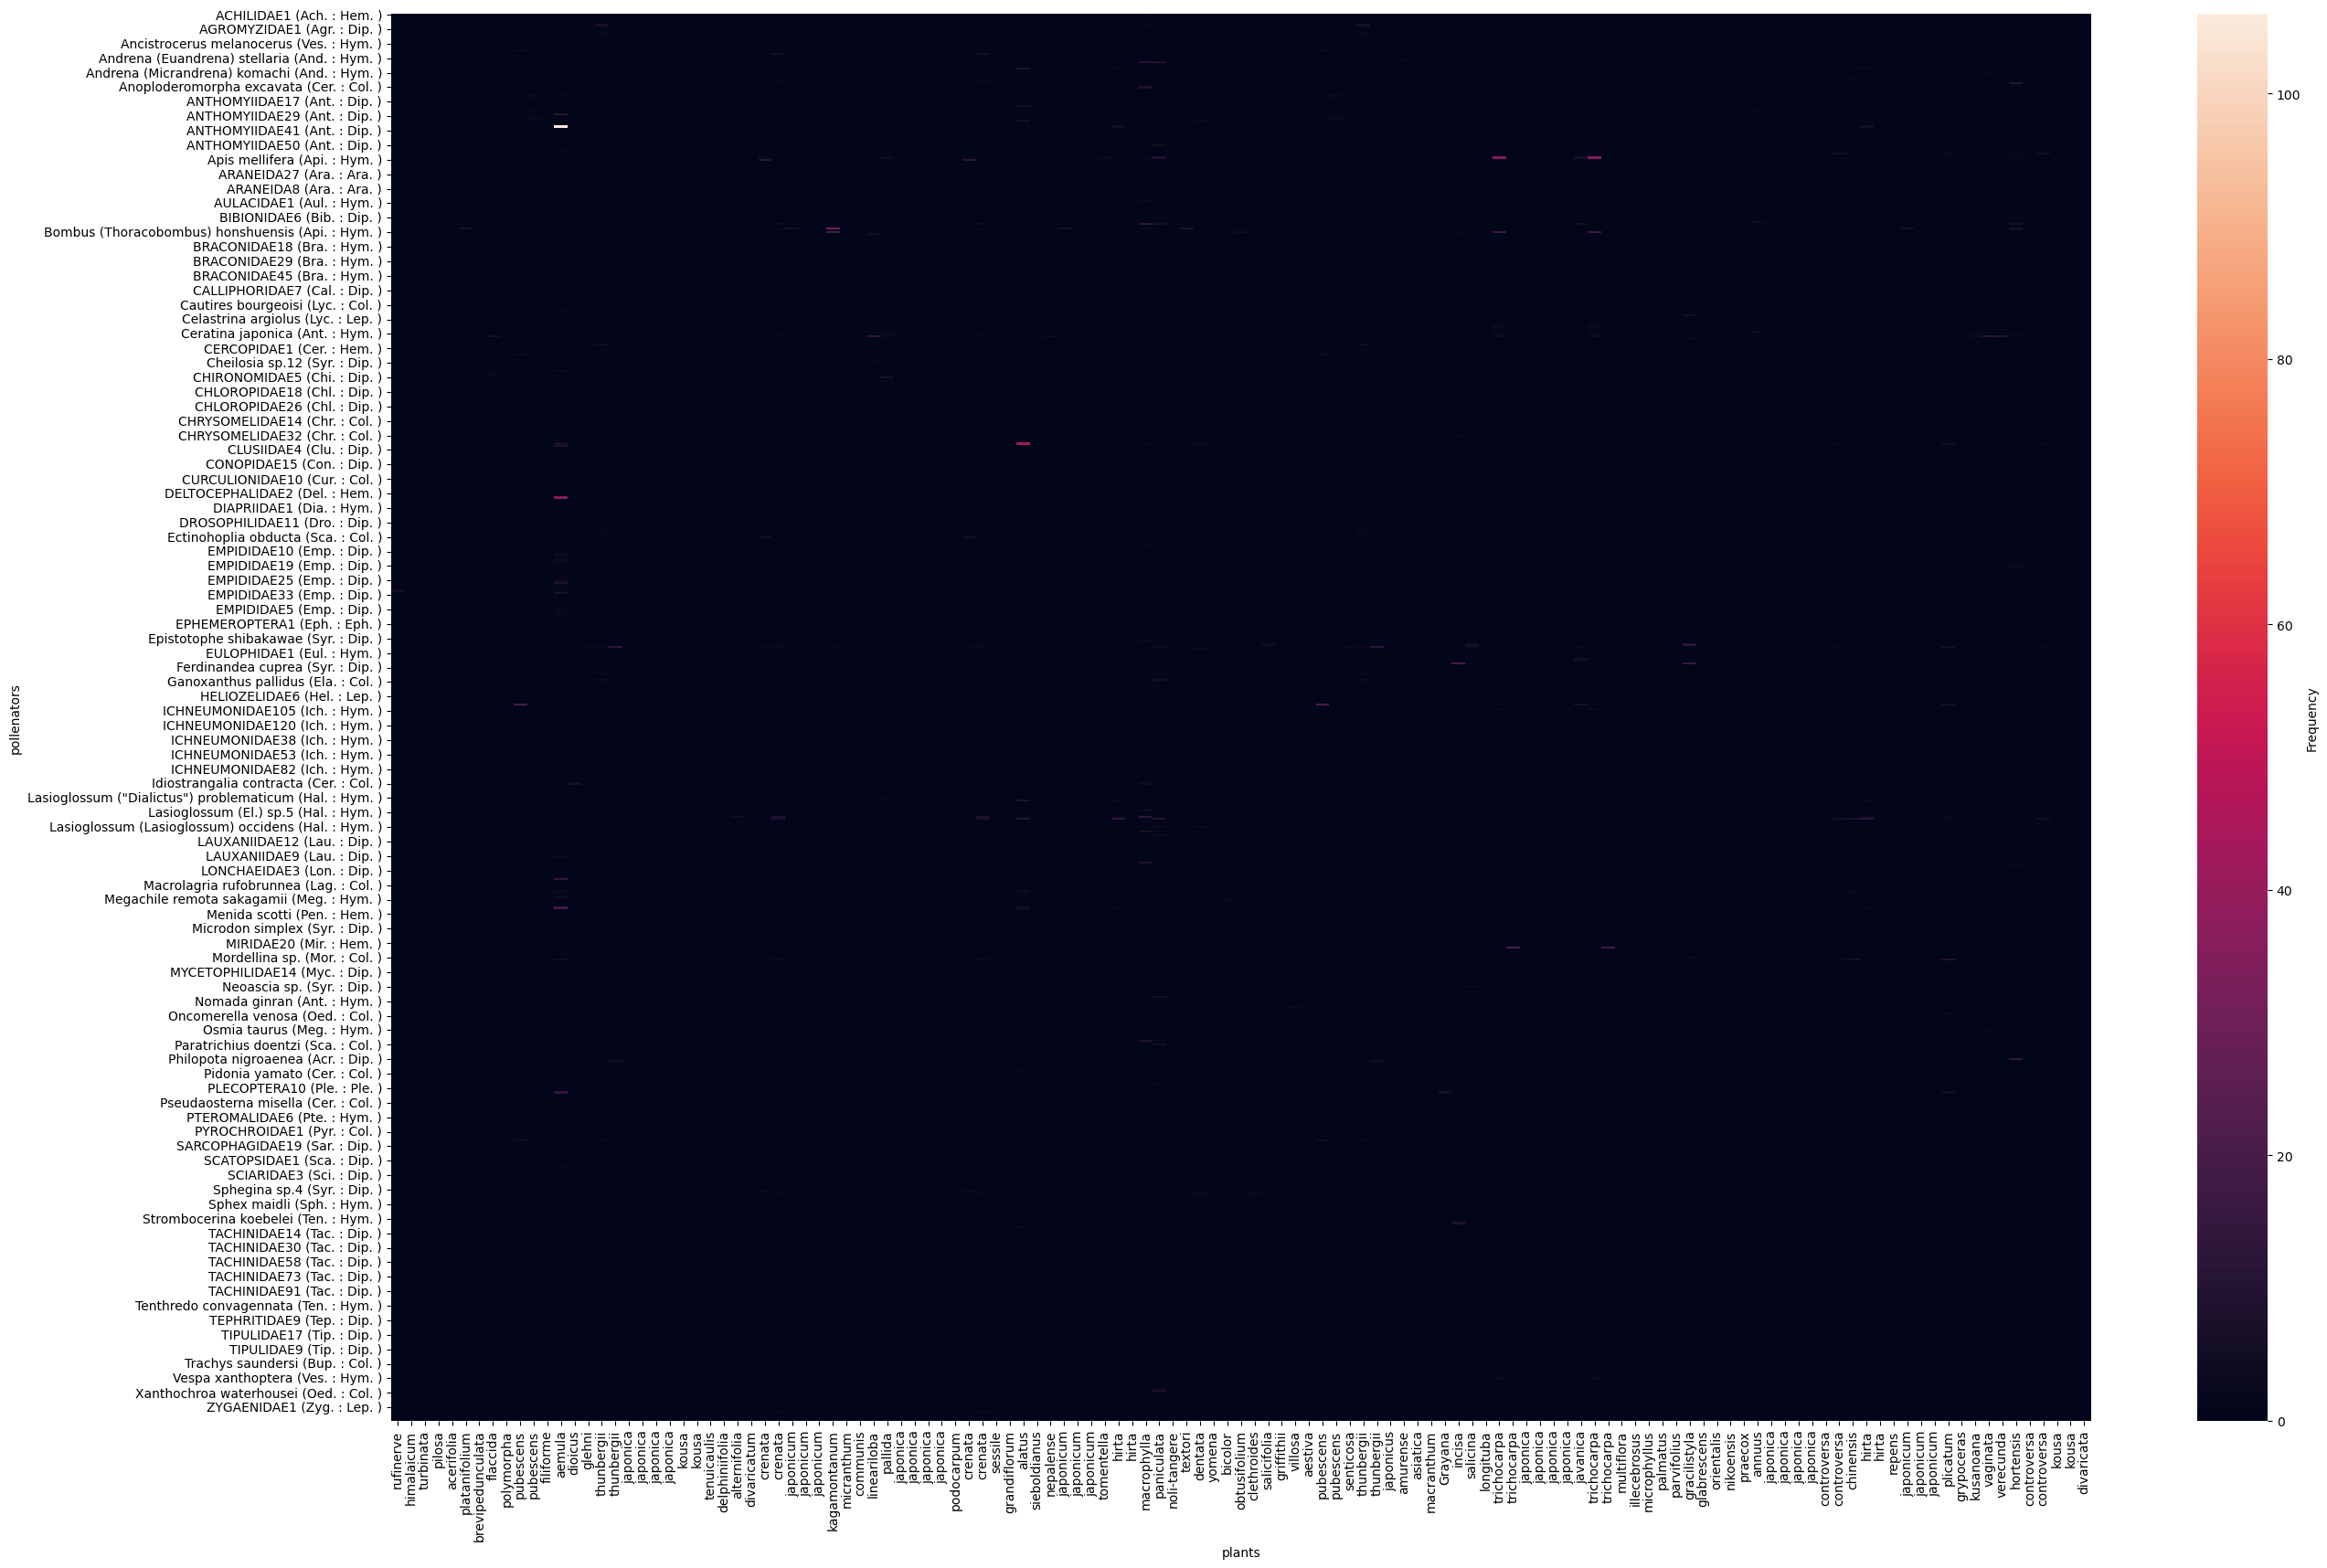

In [298]:

plt.figure(figsize = (30,20))
plt.xlabel('plant')
heatmap=sn.heatmap(df0[plant_species], 
                   cmap=sn.color_palette("rocket", as_cmap=True),
                   cbar_kws={'label': 'Frequency'})

heatmap.set(xlabel='plants')              
plt.savefig('all_Data_heatmap',bbox_inches='tight')


In [263]:
# I have created a function in order to deal with thresholds:
# put a statement that takes care of isolated pollinators.


def _df0(thr, isolated_drop = True):
    #drop columns with frequencies less than thr
    to_drop = []
    for n in plant_species:
        if np.max(df0[n].values) <thr:
            to_drop.append(n)
    dfdrop = df0.drop(columns = to_drop)
    #drop isolated pollinators(rows with max value of zero):

    if isolated_drop == True:
        rows_to_drop = []
        for m in range(len(df.index)):
            if np.max(dfdrop.iloc[m, :]) == 0:
                rows_to_drop.append(m)
        dfdrop = dfdrop.drop(dfdrop.index[rows_to_drop])
    return dfdrop



In [264]:
_df0(20) # this is with isolated pollinators (rows with max value of zero)


pubescens  aemula  kagamontanum  \
pollenators                                                                     
Acteniceromorphus nipponensis (Ela. : Col. )          0       0             0   
Actina jezoensis (Str. : Dip. )                       0       1             0   
Adelphocoris triannulatus (Mir. : Hem. )              0       0             0   
Aglaostigma neburosa (Ten. : Hym. )                   0       1             0   
AGROMYZIDAE1 (Agr. : Dip. )                           0       0             0   
...                                                 ...     ...           ...   
Vespa xanthoptera (Ves. : Hym. )                      1       0             0   
Vespula vulgaris (Ves. : Hym. )                       0       0             0   
Xerasia variegata (Byt. : Col. )                      0       0             0   
Camponotus sp. (For. : Hym. )                         0       1             0   
Andrena sp. (And. : Hym. )                            0       1             0   

                                              alatus  pubescens  trichocarpa  \
pollenators                                                                    
Acteniceromorphus nipponensis (Ela. : Col. )       1          0            0   
Actina jezoensis (Str. : Dip. )                    0          0            0   
Adelphocoris triannulatus (Mir. : Hem. )           0          0            1   
Aglaostigma neburosa (Ten. : Hym. )                0          0            0   
AGROMYZIDAE1 (Agr. : Dip. )                        1          0            0   
...                                              ...        ...          ...   
Vespa xanthoptera (Ves. : Hym. )                   0          0            3   
Vespula vulgaris (Ves. : Hym. )                    0          0            1   
Xerasia variegata (Byt. : Col. )                   1          0            0   
Camponotus sp. (For. : Hym. )                      0          0            0   
Andrena sp. (And. : Hym. )                         0          0            0   

                                              trichocarpa  
pollenators                                                
Acteniceromorphus nipponensis (Ela. : Col. )            0  
Actina jezoensis (Str. : Dip. )                         0  
Adelphocoris triannulatus (Mir. : Hem. )                0  
Aglaostigma neburosa (Ten. : Hym. )                     0  
AGROMYZIDAE1 (Agr. : Dip. )                             0  
...                                                   ...  
Vespa xanthoptera (Ves. : Hym. )                        0  
Vespula vulgaris (Ves. : Hym. )                         0  
Xerasia variegata (Byt. : Col. )                        0  
Camponotus sp. (For. : Hym. )                           0  
Andrena sp. (And. : Hym. )                              0  

[304 rows x 7 columns]

In [265]:
_df0(20, False) # this is without the isolated pollinators.

pubescens  aemula  kagamontanum  \
pollenators                                                                     
ACHILIDAE1 (Ach. : Hem. )                             0       0             0   
Acteniceromorphus nipponensis (Ela. : Col. )          0       0             0   
Actina jezoensis (Str. : Dip. )                       0       1             0   
Adelphocoris triannulatus (Mir. : Hem. )              0       0             0   
AGALLIIDAE1 (Aga. : Hem. )                            0       0             0   
...                                                 ...     ...           ...   
LUSIIDAE1 (Clu. : Dip. )                              0       0             0   
Lasioglossum (El.) aff (Hal. : Hym )                  0       0             0   
Camponotus sp. (For. : Hym. )                         0       1             0   
Andrena sp. (And. : Hym. )                            0       1             0   
Ceratina sp. (Ant. : Hym.)                            0       0             0   

                                              alatus  pubescens  trichocarpa  \
pollenators                                                                    
ACHILIDAE1 (Ach. : Hem. )                          0          0            0   
Acteniceromorphus nipponensis (Ela. : Col. )       1          0            0   
Actina jezoensis (Str. : Dip. )                    0          0            0   
Adelphocoris triannulatus (Mir. : Hem. )           0          0            1   
AGALLIIDAE1 (Aga. : Hem. )                         0          0            0   
...                                              ...        ...          ...   
LUSIIDAE1 (Clu. : Dip. )                           0          0            0   
Lasioglossum (El.) aff (Hal. : Hym )               0          0            0   
Camponotus sp. (For. : Hym. )                      0          0            0   
Andrena sp. (And. : Hym. )                         0          0            0   
Ceratina sp. (Ant. : Hym.)                         0          0            0   

                                              trichocarpa  
pollenators                                                
ACHILIDAE1 (Ach. : Hem. )                               0  
Acteniceromorphus nipponensis (Ela. : Col. )            0  
Actina jezoensis (Str. : Dip. )                         0  
Adelphocoris triannulatus (Mir. : Hem. )                0  
AGALLIIDAE1 (Aga. : Hem. )                              0  
...                                                   ...  
LUSIIDAE1 (Clu. : Dip. )                                0  
Lasioglossum (El.) aff (Hal. : Hym )                    0  
Camponotus sp. (For. : Hym. )                           0  
Andrena sp. (And. : Hym. )                              0  
Ceratina sp. (Ant. : Hym.)                              0  

[679 rows x 7 columns]

Index(['pubescens', 'aemula', 'kagamontanum', 'alatus', 'pubescens',
       'trichocarpa', 'trichocarpa'],
      dtype='object')


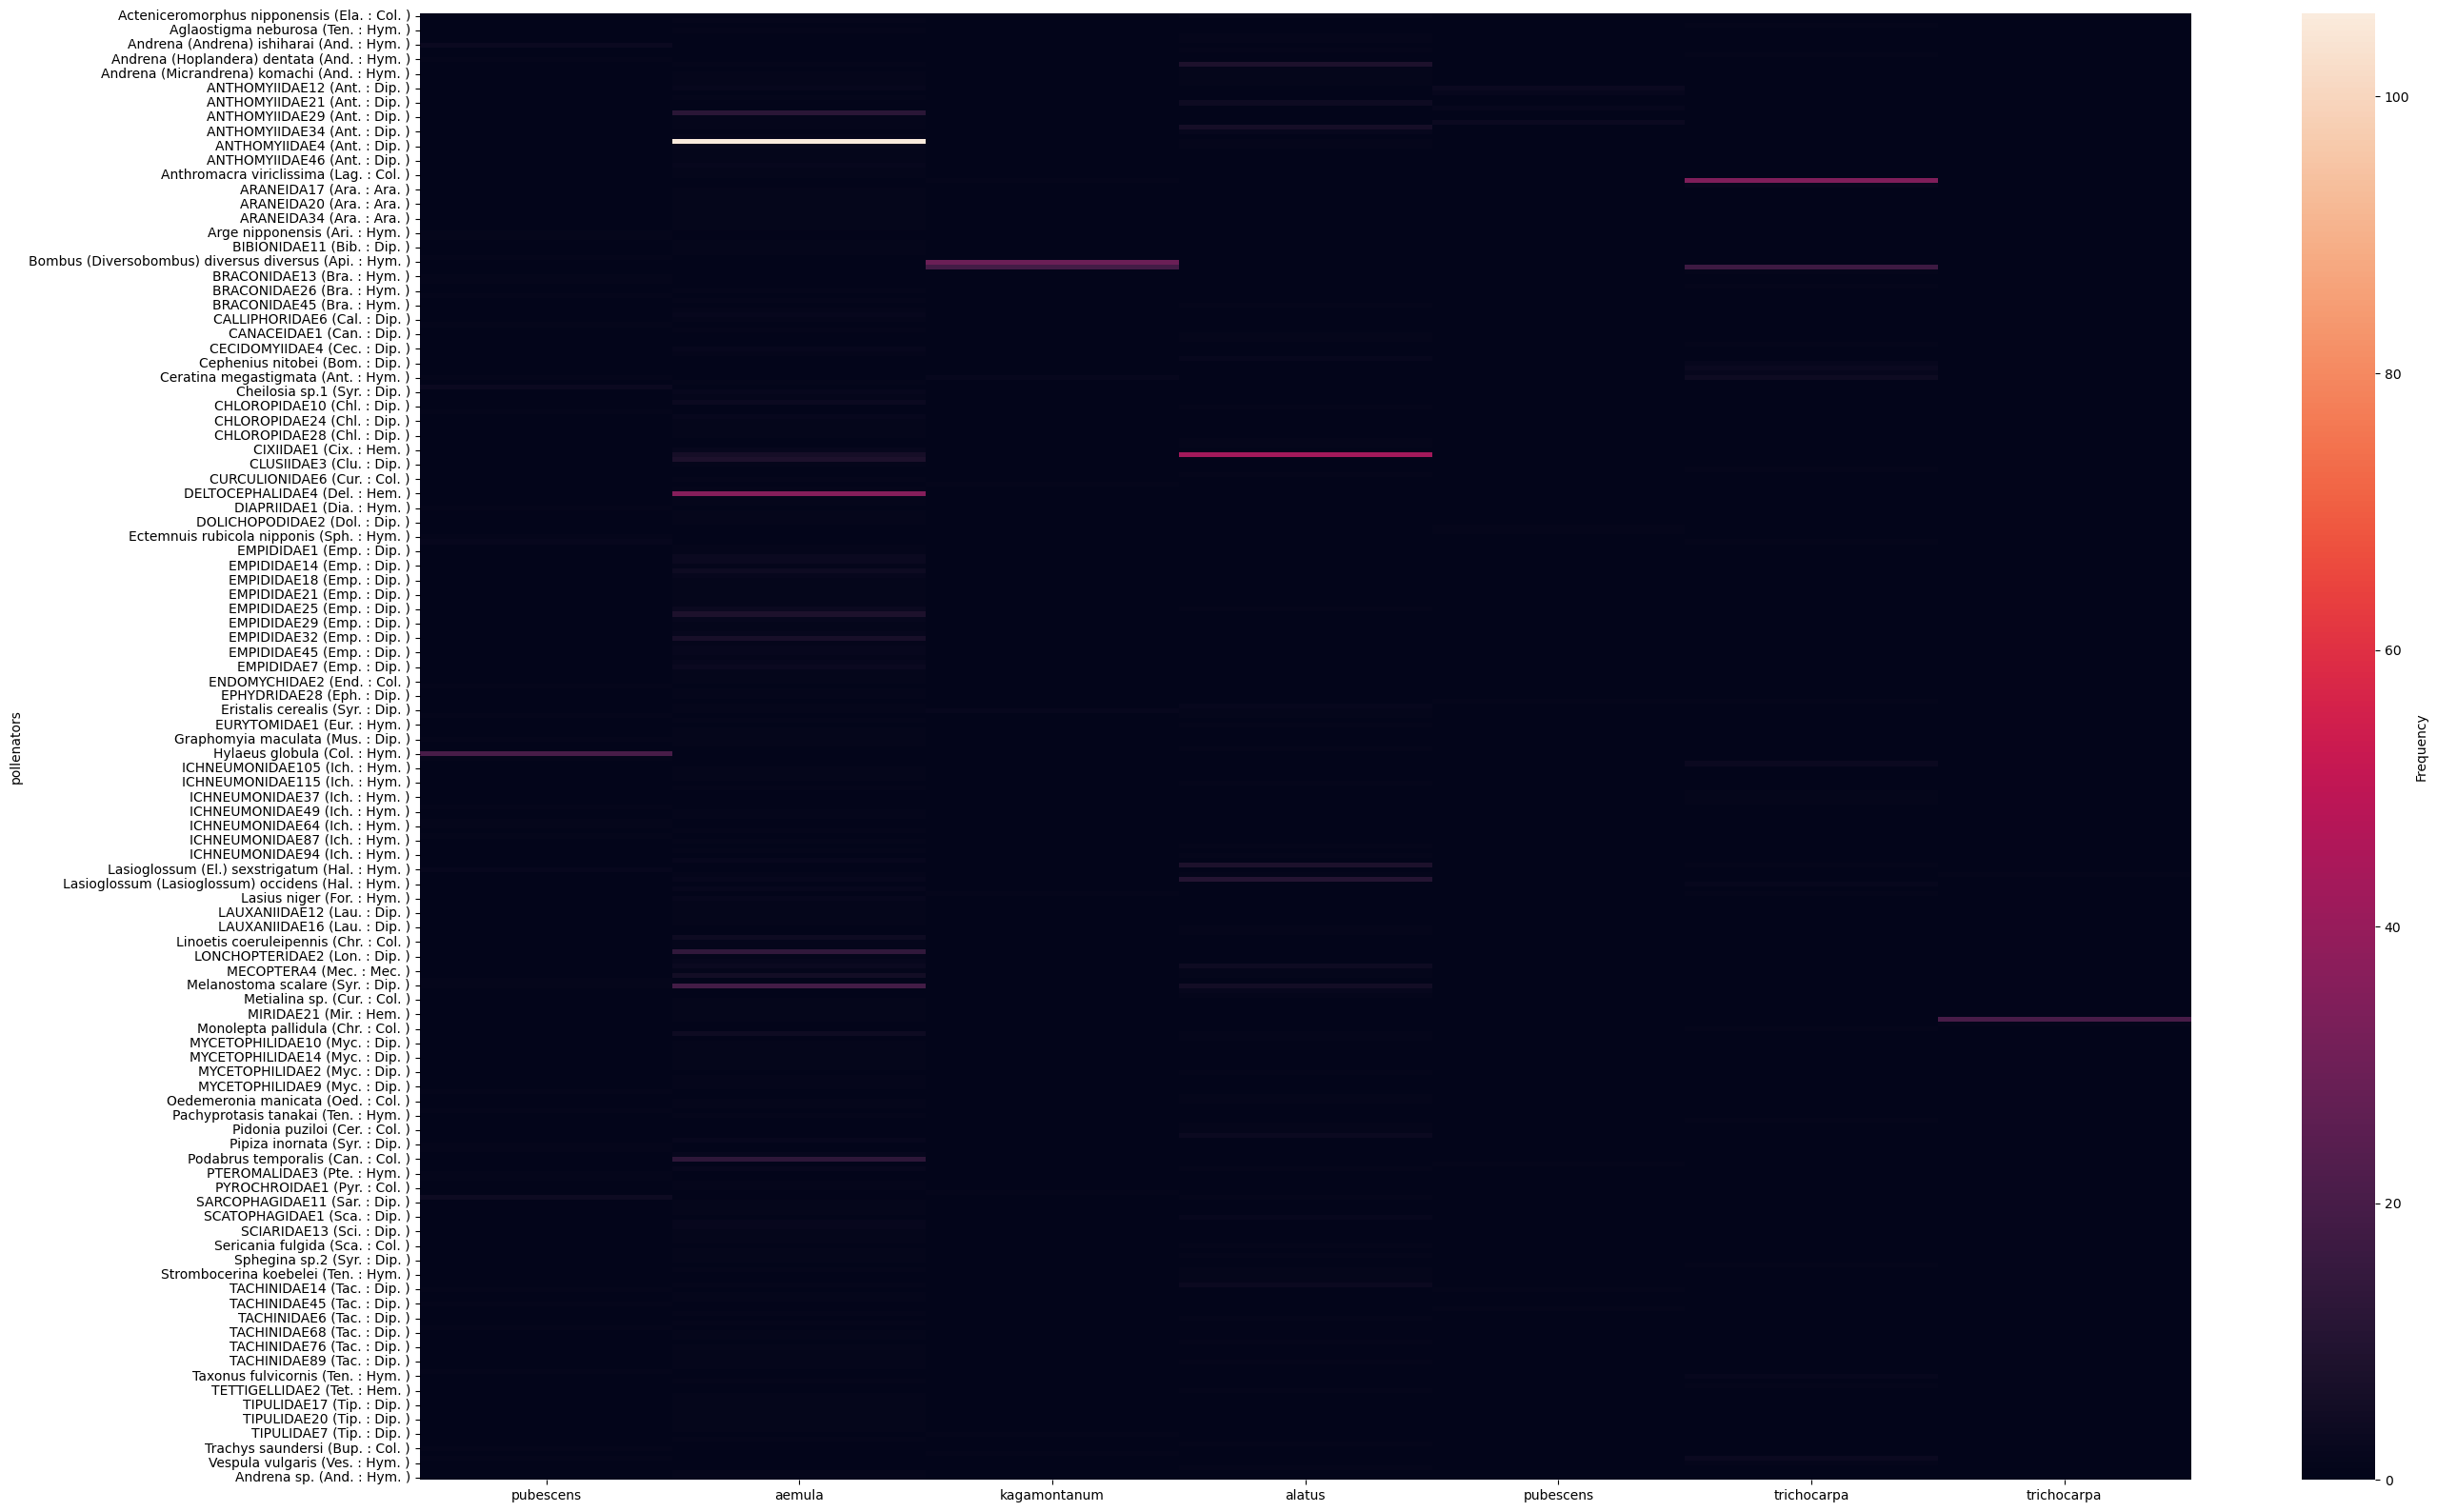

In [297]:

plt.figure(figsize = (30,20))

eatmap=sn.heatmap(_df0(20), 
                   cmap=sn.color_palette("rocket", as_cmap=True),
                   cbar_kws={'label': 'Frequency'})


heatmap.set(xlabel='plants')              
plt.savefig('all_Data_heatmap',bbox_inches='tight')

print(_df0(20, True).columns)

Index(['pubescens', 'aemula', 'kagamontanum', 'alatus', 'pubescens',
       'trichocarpa', 'trichocarpa'],
      dtype='object')


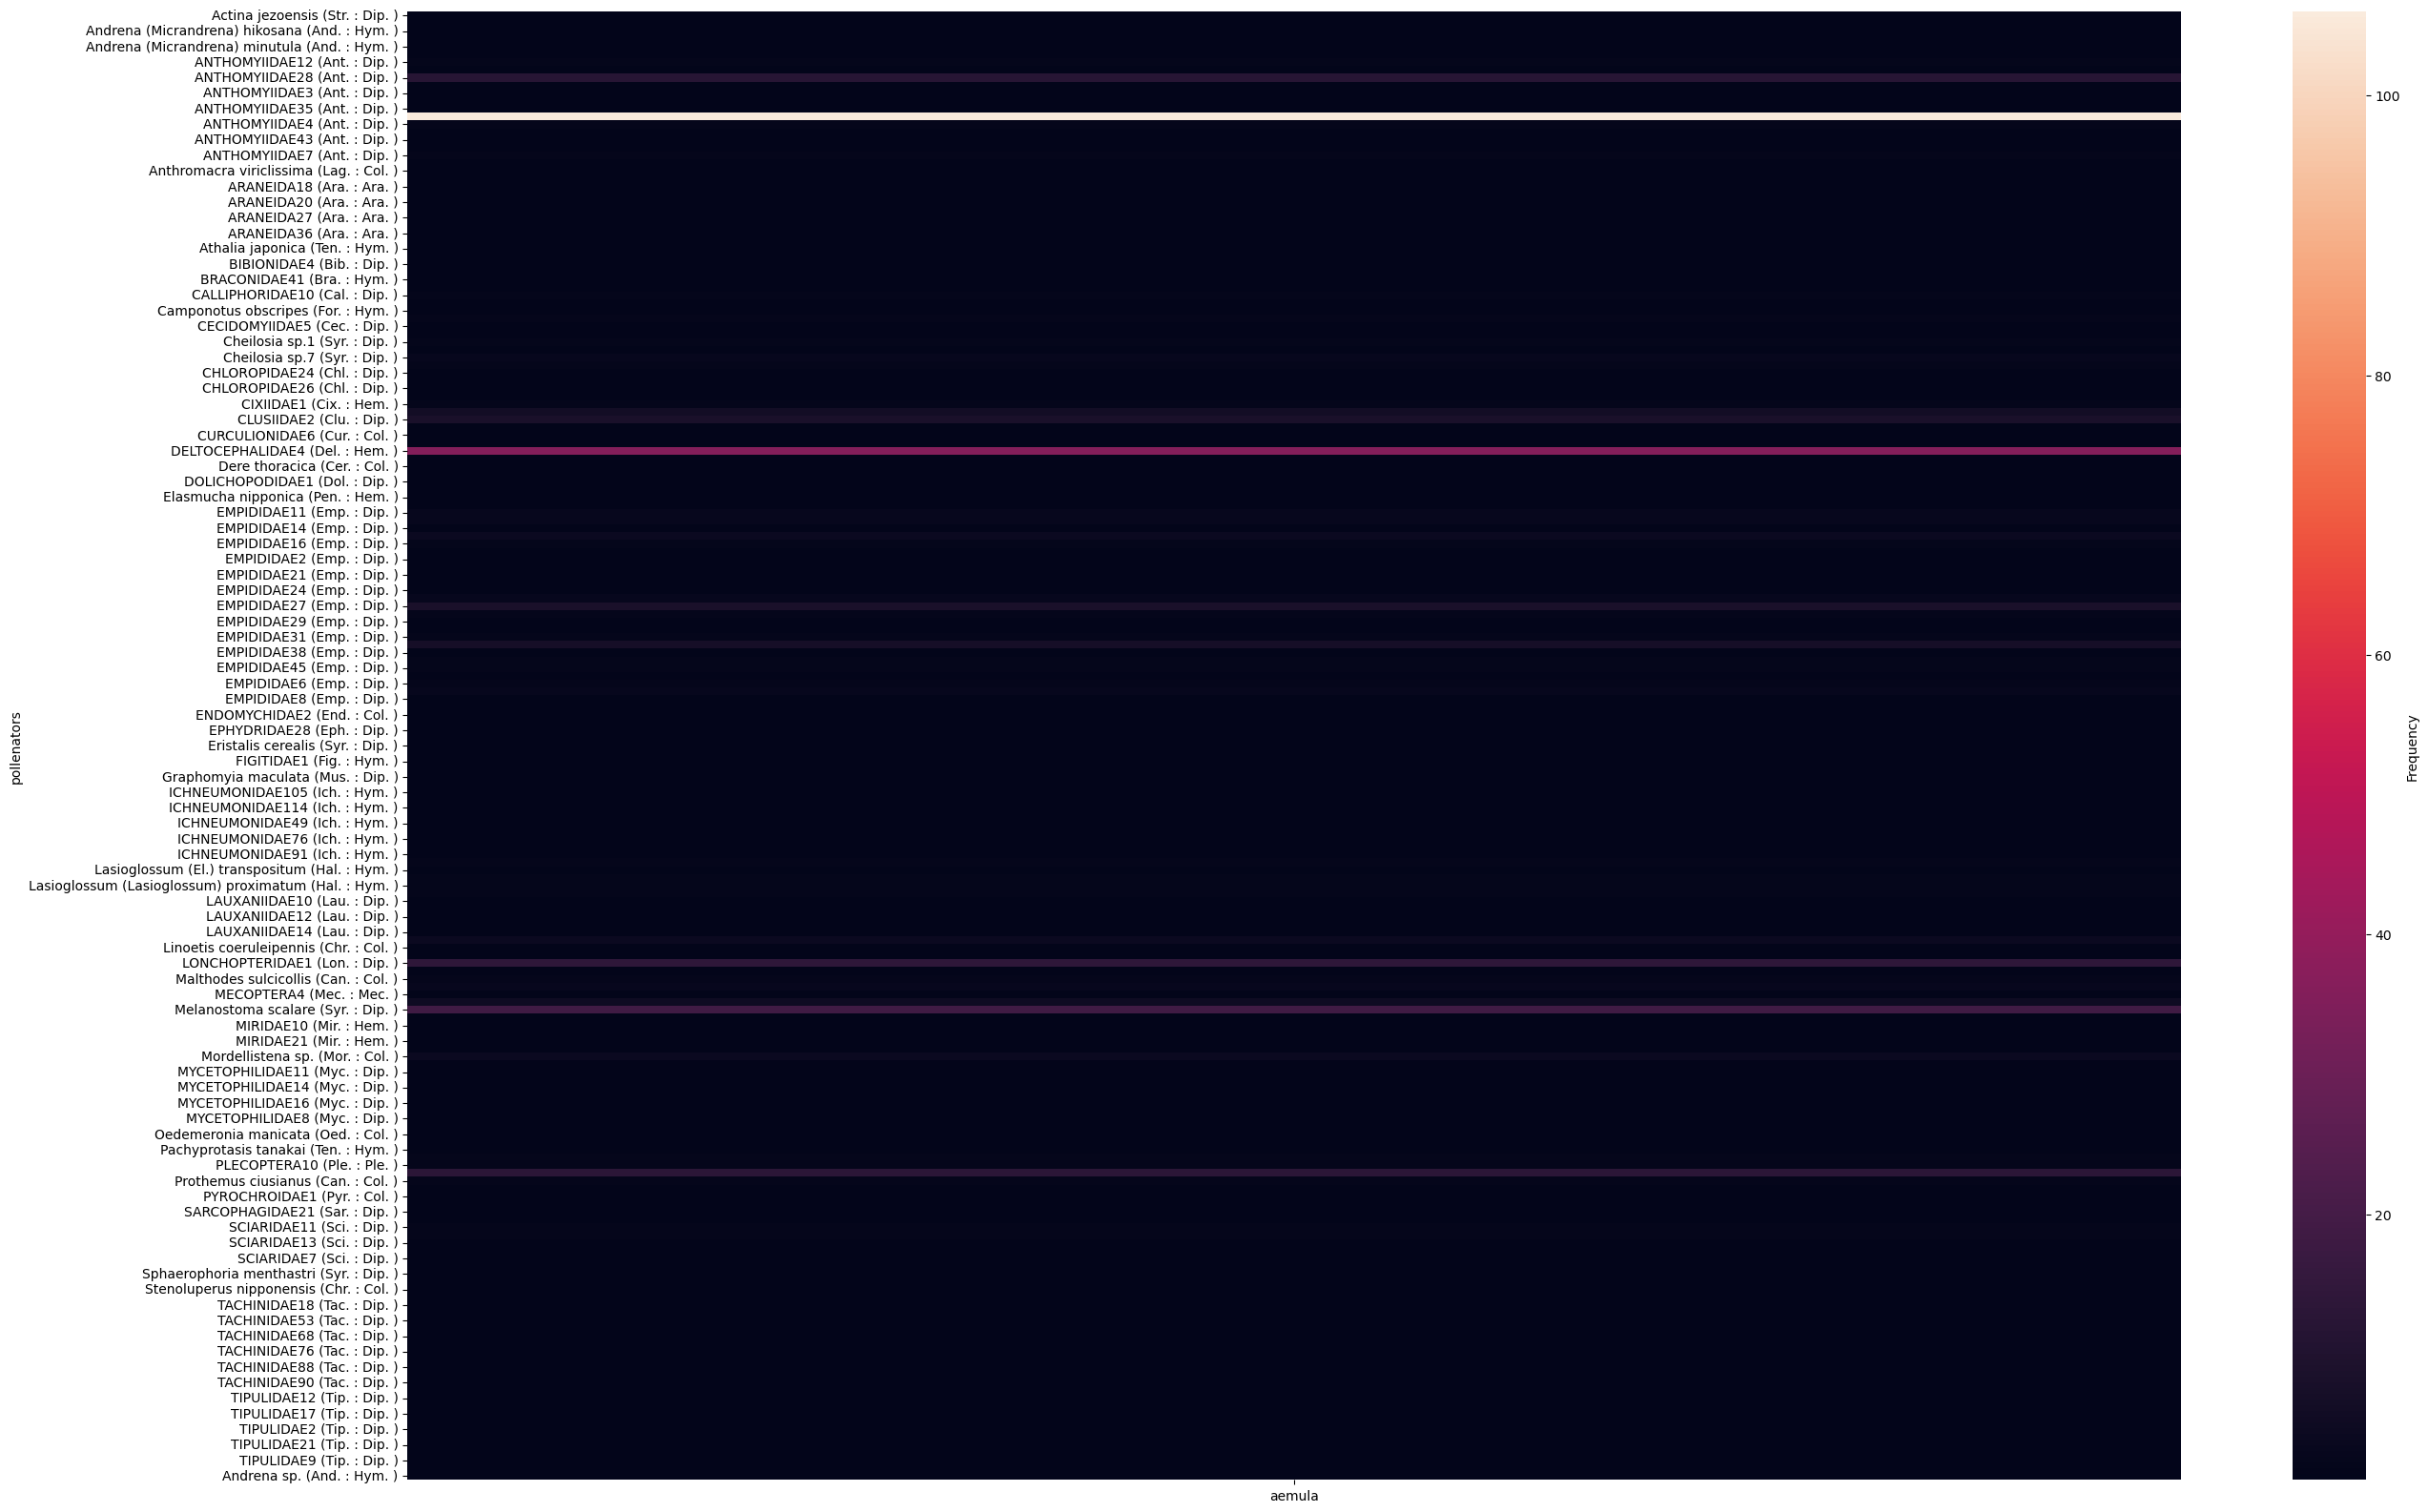

In [299]:
plt.figure(figsize = (30,20))

eatmap=sn.heatmap(_df0(100), 
                   cmap=sn.color_palette("rocket", as_cmap=True),
                   cbar_kws={'label': 'Frequency'})


heatmap.set(xlabel='plants')              
plt.savefig('all_Data_heatmap',bbox_inches='tight')

print(_df0(20, True).columns)

# Creating bipartite network:

here we create df2 is a matrix only with indeces, without any names, and df1_use works like a bridge between indeces +1000 and the pollinators names.

In [240]:
df1 = dataframe.copy()
df1_use = dataframe.copy()

In [241]:
df1

Unnamed: 0_level_0 plant_ge      Acer  \
                               Unnamed: 0_level_1 plant_sp rufinerve   
                                        pol_ge_sp      no.         1   
0                       ACHILIDAE1 (Ach. : Hem. )       53         0   
1    Acteniceromorphus nipponensis (Ela. : Col. )      398         0   
2                 Actina jezoensis (Str. : Dip. )      139         0   
3        Adelphocoris triannulatus (Mir. : Hem. )       28         0   
4                      AGALLIIDAE1 (Aga. : Hem. )       47         0   
..                                            ...      ...       ...   
674                      LUSIIDAE1 (Clu. : Dip. )      675         0   
675          Lasioglossum (El.) aff (Hal. : Hym )      676         0   
676                 Camponotus sp. (For. : Hym. )      677         0   
677                    Andrena sp. (And. : Hym. )      678         0   
678                    Ceratina sp. (Ant. : Hym.)      679         0   

    Adenocaulon  Aesculus Agrimonia  Ainsliaea      Alangium       Ampelopsis  \
     himalaicum turbinata    pilosa acerifolia platanifolium brevipedunculata   
              2         3         4          5             6                7   
0             0         0         0          0             0                0   
1             0         0         0          0             0                0   
2             0         0         0          0             0                0   
3             0         0         0          0             0                0   
4             0         0         0          0             0                0   
..          ...       ...       ...        ...           ...              ...   
674           0         0         0          0             0                0   
675           0         0         0          0             0                0   
676           0         0         0          0             0                0   
677           0         0         0          0             0                0   
678           0         0         0          0             0                0   

     Anemone  ... Tripterospermum Viburnum      Viola                     \
    flaccida  ...       japonicum plicatum grypoceras kusanoana vaginata   
           8  ...              84       85         86        87       88   
0          0  ...               0        0          0         0        0   
1          0  ...               0        0          0         0        0   
2          0  ...               0        0          0         0        0   
3          0  ...               0        0          0         0        0   
4          0  ...               0        0          0         0        0   
..       ...  ...             ...      ...        ...       ...      ...   
674        0  ...               0        0          0         0        0   
675        0  ...               0        0          0         0        0   
676        0  ...               0        0          0         0        0   
677        0  ...               0        0          0         0        0   
678        0  ...               0        0          0         0        0   

                Weigela      Cornus       Caryopteris   
    verecunda hortensis controversa kousa   divaricata  
           89        90          91    92           93  
0           0         0           0     0            0  
1           0         0           0     0            0  
2           0         0           0     0            0  
3           0         0           0     0            0  
4           0         0           0     0            0  
..        ...       ...         ...   ...          ...  
674         0         0           0     0            0  
675         0         0           0     0            0  
676         0         0           0     0            0  
677         0         0           0     0            0  
678         0         0           0     0            0  

[679 rows x 95 columns]

In [242]:
df1 = df1.droplevel(level = [0, 1], axis = 1)
df1_use = df1_use.droplevel(level = [0, 1], axis = 1)
df1


pol_ge_sp  no.  1  2  3  4  5  6  7  \
0                       ACHILIDAE1 (Ach. : Hem. )   53  0  0  0  0  0  0  0   
1    Acteniceromorphus nipponensis (Ela. : Col. )  398  0  0  0  0  0  0  0   
2                 Actina jezoensis (Str. : Dip. )  139  0  0  0  0  0  0  0   
3        Adelphocoris triannulatus (Mir. : Hem. )   28  0  0  0  0  0  0  0   
4                      AGALLIIDAE1 (Aga. : Hem. )   47  0  0  0  0  0  0  0   
..                                            ...  ... .. .. .. .. .. .. ..   
674                      LUSIIDAE1 (Clu. : Dip. )  675  0  0  0  0  0  0  0   
675          Lasioglossum (El.) aff (Hal. : Hym )  676  0  0  0  0  0  0  0   
676                 Camponotus sp. (For. : Hym. )  677  0  0  0  0  0  0  0   
677                    Andrena sp. (And. : Hym. )  678  0  0  0  0  0  0  0   
678                    Ceratina sp. (Ant. : Hym.)  679  0  0  0  0  0  0  0   

     8  ...  84  85  86  87  88  89  90  91  92  93  
0    0  ...   0   0   0   0   0   0   0   0   0   0  
1    0  ...   0   0   0   0   0   0   0   0   0   0  
2    0  ...   0   0   0   0   0   0   0   0   0   0  
3    0  ...   0   0   0   0   0   0   0   0   0   0  
4    0  ...   0   0   0   0   0   0   0   0   0   0  
..  ..  ...  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  
674  0  ...   0   0   0   0   0   0   0   0   0   0  
675  0  ...   0   0   0   0   0   0   0   0   0   0  
676  0  ...   0   0   0   0   0   0   0   0   0   0  
677  0  ...   0   0   0   0   0   0   0   0   0   0  
678  0  ...   0   0   0   0   0   0   0   0   0   0  

[679 rows x 95 columns]

In [257]:
df1_use.index = df1_use.index + 1000

In [258]:
df1_use

pol_ge_sp  no.  1  2  3  4  5  6  7  \
1000                     ACHILIDAE1 (Ach. : Hem. )   53  0  0  0  0  0  0  0   
1001  Acteniceromorphus nipponensis (Ela. : Col. )  398  0  0  0  0  0  0  0   
1002               Actina jezoensis (Str. : Dip. )  139  0  0  0  0  0  0  0   
1003      Adelphocoris triannulatus (Mir. : Hem. )   28  0  0  0  0  0  0  0   
1004                    AGALLIIDAE1 (Aga. : Hem. )   47  0  0  0  0  0  0  0   
...                                            ...  ... .. .. .. .. .. .. ..   
1674                      LUSIIDAE1 (Clu. : Dip. )  675  0  0  0  0  0  0  0   
1675          Lasioglossum (El.) aff (Hal. : Hym )  676  0  0  0  0  0  0  0   
1676                 Camponotus sp. (For. : Hym. )  677  0  0  0  0  0  0  0   
1677                    Andrena sp. (And. : Hym. )  678  0  0  0  0  0  0  0   
1678                    Ceratina sp. (Ant. : Hym.)  679  0  0  0  0  0  0  0   

      8  ...  84  85  86  87  88  89  90  91  92  93  
1000  0  ...   0   0   0   0   0   0   0   0   0   0  
1001  0  ...   0   0   0   0   0   0   0   0   0   0  
1002  0  ...   0   0   0   0   0   0   0   0   0   0  
1003  0  ...   0   0   0   0   0   0   0   0   0   0  
1004  0  ...   0   0   0   0   0   0   0   0   0   0  
...  ..  ...  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  
1674  0  ...   0   0   0   0   0   0   0   0   0   0  
1675  0  ...   0   0   0   0   0   0   0   0   0   0  
1676  0  ...   0   0   0   0   0   0   0   0   0   0  
1677  0  ...   0   0   0   0   0   0   0   0   0   0  
1678  0  ...   0   0   0   0   0   0   0   0   0   0  

[679 rows x 95 columns]

In [243]:
df1 = df1.drop(columns = ['no.', 'pol_ge_sp'])
df1

1   2   3   4   5   6   7   8   9   10  ...  84  85  86  87  88  89  90  \
0     0   0   0   0   0   0   0   0   0   0  ...   0   0   0   0   0   0   0   
1     0   0   0   0   0   0   0   0   0   0  ...   0   0   0   0   0   0   0   
2     0   0   0   0   0   0   0   0   0   0  ...   0   0   0   0   0   0   0   
3     0   0   0   0   0   0   0   0   0   0  ...   0   0   0   0   0   0   0   
4     0   0   0   0   0   0   0   0   0   0  ...   0   0   0   0   0   0   0   
..   ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ...  ..  ..  ..  ..  ..  ..  ..   
674   0   0   0   0   0   0   0   0   0   0  ...   0   0   0   0   0   0   0   
675   0   0   0   0   0   0   0   0   0   0  ...   0   0   0   0   0   0   0   
676   0   0   0   0   0   0   0   0   0   0  ...   0   0   0   0   0   0   0   
677   0   0   0   0   0   0   0   0   0   0  ...   0   0   0   0   0   0   0   
678   0   0   0   0   0   0   0   0   0   0  ...   0   0   0   0   0   0   0   

     91  92  93  
0     0   0   0  
1     0   0   0  
2     0   0   0  
3     0   0   0  
4     0   0   0  
..   ..  ..  ..  
674   0   0   0  
675   0   0   0  
676   0   0   0  
677   0   0   0  
678   0   0   0  

[679 rows x 93 columns]

In [244]:
df2 = df1.copy()

In [245]:
df2.index = df2.index + 1000

In [246]:
df2

1   2   3   4   5   6   7   8   9   10  ...  84  85  86  87  88  89  90  \
1000   0   0   0   0   0   0   0   0   0   0  ...   0   0   0   0   0   0   0   
1001   0   0   0   0   0   0   0   0   0   0  ...   0   0   0   0   0   0   0   
1002   0   0   0   0   0   0   0   0   0   0  ...   0   0   0   0   0   0   0   
1003   0   0   0   0   0   0   0   0   0   0  ...   0   0   0   0   0   0   0   
1004   0   0   0   0   0   0   0   0   0   0  ...   0   0   0   0   0   0   0   
...   ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ...  ..  ..  ..  ..  ..  ..  ..   
1674   0   0   0   0   0   0   0   0   0   0  ...   0   0   0   0   0   0   0   
1675   0   0   0   0   0   0   0   0   0   0  ...   0   0   0   0   0   0   0   
1676   0   0   0   0   0   0   0   0   0   0  ...   0   0   0   0   0   0   0   
1677   0   0   0   0   0   0   0   0   0   0  ...   0   0   0   0   0   0   0   
1678   0   0   0   0   0   0   0   0   0   0  ...   0   0   0   0   0   0   0   

      91  92  93  
1000   0   0   0  
1001   0   0   0  
1002   0   0   0  
1003   0   0   0  
1004   0   0   0  
...   ..  ..  ..  
1674   0   0   0  
1675   0   0   0  
1676   0   0   0  
1677   0   0   0  
1678   0   0   0  

[679 rows x 93 columns]

In [247]:
df2.to_csv('/Users/melikakeshavarz/Desktop/INFO/matrix.csv')

In [261]:
def _df2(thr, isolated_drop = True):
    #drop columns with frequencies less than thr
    to_drop = []
    for n in df2.columns:
        if np.max(df2[n].values) <thr:
            to_drop.append(n)
    dfdrop = df2.drop(columns = to_drop)
    #drop isolated pollinators(rows with max value of zero):

    if isolated_drop == True:
        rows_to_drop = []
        for m in range(len(df2.index)):
            if np.max(dfdrop.iloc[m, :]) == 0:
                rows_to_drop.append(m)
        dfdrop = dfdrop.drop(dfdrop.index[rows_to_drop])
    return dfdrop

In [262]:
_df2(20)


10  12  24  34  64  67
1001   0   0   0   1   0   0
1002   0   1   0   0   0   0
1003   0   0   0   0   1   0
1006   0   1   0   0   0   0
1007   0   0   0   1   0   0
...   ..  ..  ..  ..  ..  ..
1658   1   0   0   0   3   0
1660   0   0   0   0   1   0
1666   0   0   0   1   0   0
1676   0   1   0   0   0   0
1677   0   1   0   0   0   0

[298 rows x 6 columns]

In [128]:
all_nodes = set(df2.index.union(set(df2.columns)))
all_nodes

{1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 1000,
 1001,
 1002,
 1003,
 1004,
 1005,
 1006,
 1007,
 1008,
 1009,
 1010,
 1011,
 1012,
 1013,
 1014,
 1015,
 1016,
 1017,
 1018,
 1019,
 1020,
 1021,
 1022,
 1023,
 1024,
 1025,
 1026,
 1027,
 1028,
 1029,
 1030,
 1031,
 1032,
 1033,
 1034,
 1035,
 1036,
 1037,
 1038,
 1039,
 1040,
 1041,
 1042,
 1043,
 1044,
 1045,
 1046,
 1047,
 1048,
 1049,
 1050,
 1051,
 1052,
 1053,
 1054,
 1055,
 1056,
 1057,
 1058,
 1059,
 1060,
 1061,
 1062,
 1063,
 1064,
 1065,
 1066,
 1067,
 1068,
 1069,
 1070,
 1071,
 1072,
 1073,
 1074,
 1075,
 1076,
 1077

In [256]:
# this is with threshold zero. we need to write a function that creates bipartite with many thresholds.
source_id = []
target_id = []

# Prepare node list
all_nodes = list(df2.index.union(list(df2.columns)))

# Write to Pajek format
output_file = '/Users/melikakeshavarz/Desktop/INFO/output.net'  
with open(output_file, 'w') as f:
    f.write(f"*Vertices {len(all_nodes)}\n")

    for idx in all_nodes:
        if idx in list(df2.index):
            f.write(f"{idx} \"{df0.index[idx-1000]}\"\n")
            target_id.append(idx)
        elif idx in df2.columns:
            f.write(f"{idx} \"{df0.columns[idx-1]}\"\n")
            source_id.append(idx)
    f.write("*Arcs\n")
    
    for n in list(df2.index):
        for m in list(df2.columns):
            if df2.iloc[n-1000, m-1] == 0:
                pass
            else:
                f.write(f"{df2.columns[m-1]} {df2.index[n-1000]} {df2.iloc[n-1000, m-1]}\n")
    

    

    
    




In [286]:
_df2(20)

10  12  24  34  64  67
1001   0   0   0   1   0   0
1002   0   1   0   0   0   0
1003   0   0   0   0   1   0
1006   0   1   0   0   0   0
1007   0   0   0   1   0   0
...   ..  ..  ..  ..  ..  ..
1658   1   0   0   0   3   0
1660   0   0   0   0   1   0
1666   0   0   0   1   0   0
1676   0   1   0   0   0   0
1677   0   1   0   0   0   0

[298 rows x 6 columns]

In [294]:
# a function to create bipartite network with different thresholds:



def bipartite(thr):
    source_id = []
    target_id = []

    # Prepare node list
    all_nodes = list(_df2(thr).index.union(list(_df2(thr).columns)))

    # Write to Pajek format
    output_file = '/Users/melikakeshavarz/Desktop/INFO/output_{}.net'.format(thr)  
    with open(output_file, 'w') as f:
        f.write(f"*Vertices {len(all_nodes)}\n")
        for idx in all_nodes:
            if idx in list(_df2(thr).index):
                f.write(f"{idx} \"{df1_use.loc[idx, 'pol_ge_sp']}\"\n")
                target_id.append(idx)
            elif idx in list(df2.columns):
                f.write(f"{idx} \"{plant_species[idx-1]}\"\n")
                source_id.append(idx)

            else:
                return idx

        f.write("*Arcs\n")
    
        for n in list(_df2(thr).index):
            for m in list(_df2(thr).columns):
                if _df2(thr).loc[n, m] == 0:
                    pass
                else:
                    f.write(f"{m} {n} {_df2(thr).loc[n, m]}\n")
    


In [278]:
_df2(thr)

10  12  24  34  64  67
1001   0   0   0   1   0   0
1002   0   1   0   0   0   0
1003   0   0   0   0   1   0
1006   0   1   0   0   0   0
1007   0   0   0   1   0   0
...   ..  ..  ..  ..  ..  ..
1658   1   0   0   0   3   0
1660   0   0   0   0   1   0
1666   0   0   0   1   0   0
1676   0   1   0   0   0   0
1677   0   1   0   0   0   0

[298 rows x 6 columns]

In [295]:
bipartite(20)

In [296]:
bipartite(15)
bipartite(10)
bipartite(5)

### This picture is for the network without threshold:

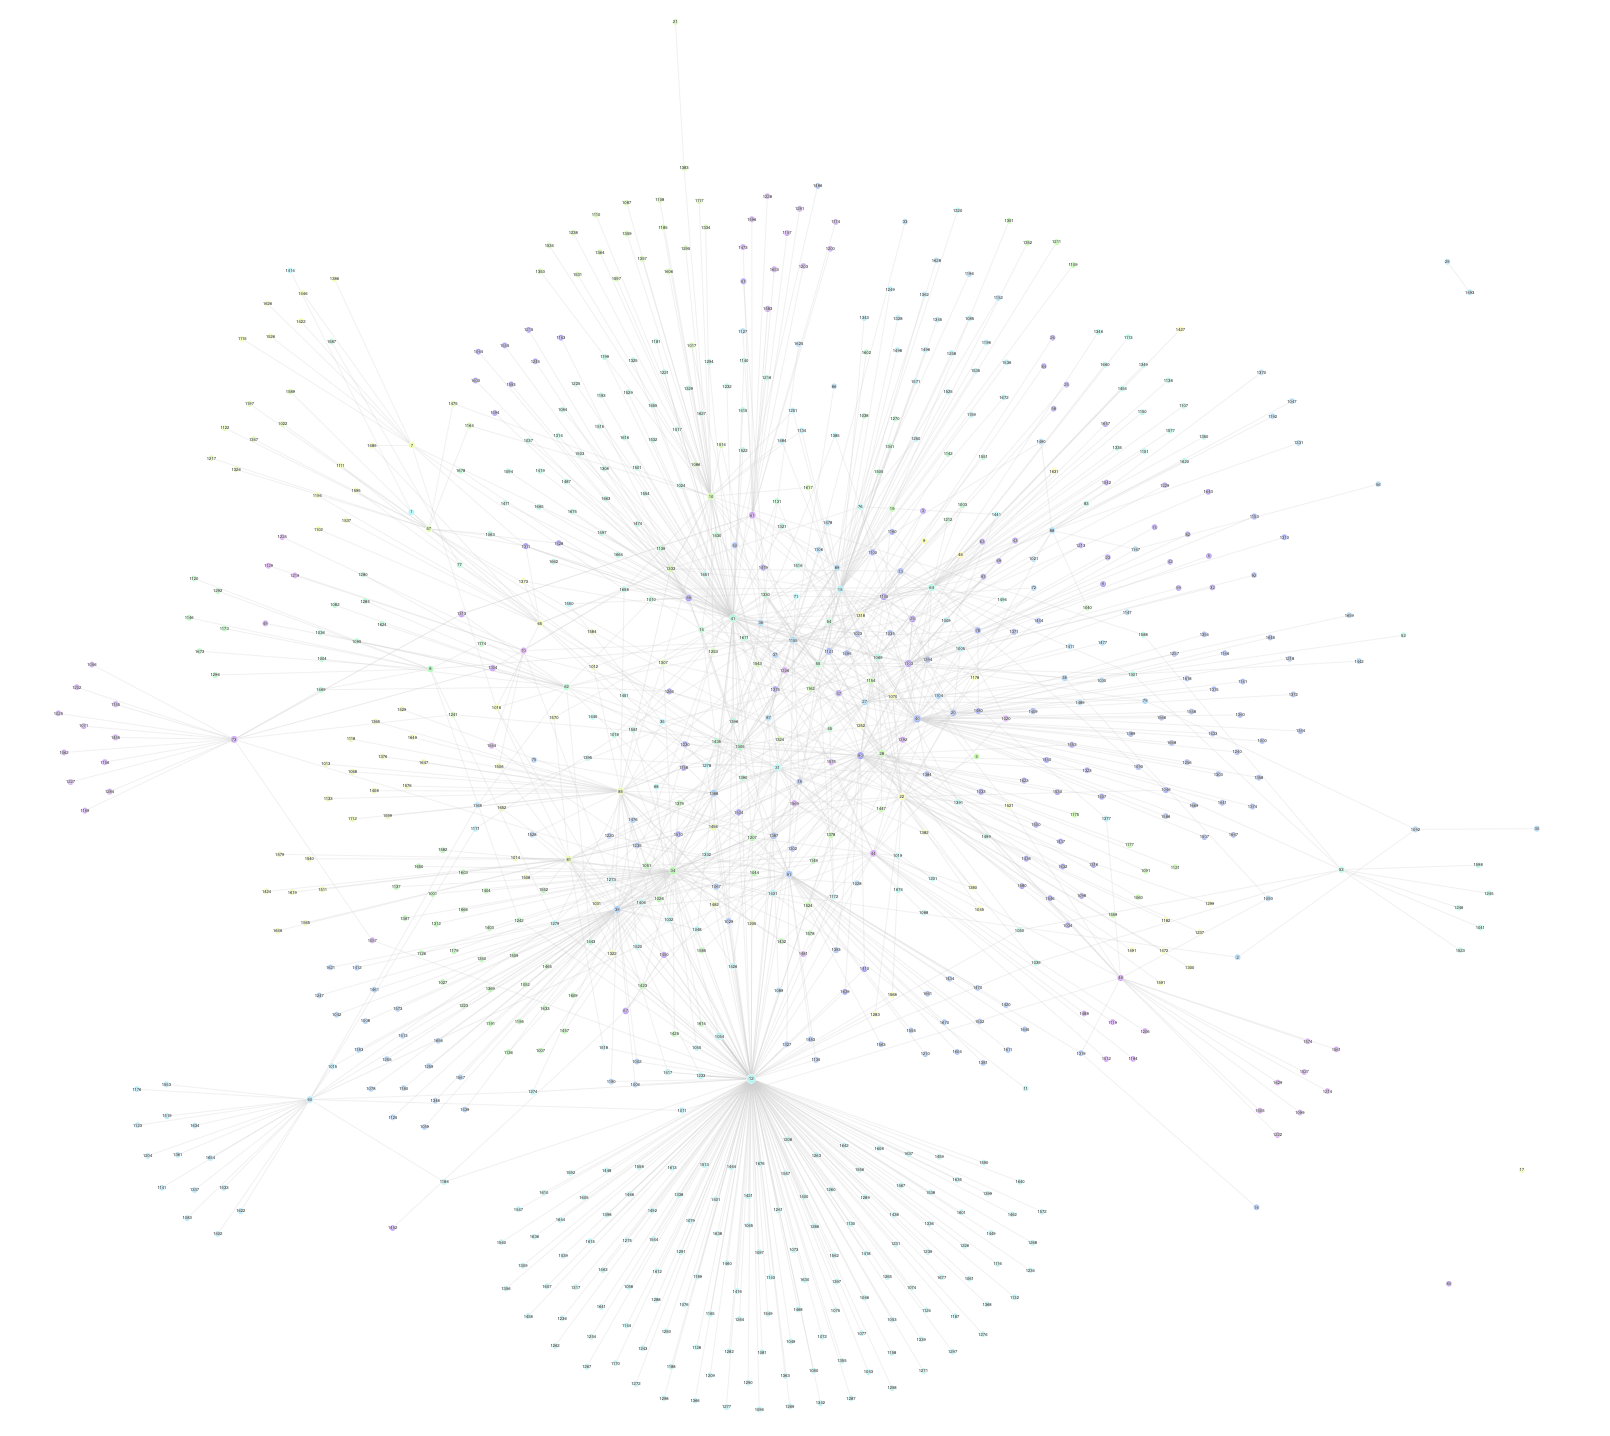

In [6]:
from IPython.display import Image
Image(filename="/Users/melikakeshavarz/Desktop/no_thr.png")

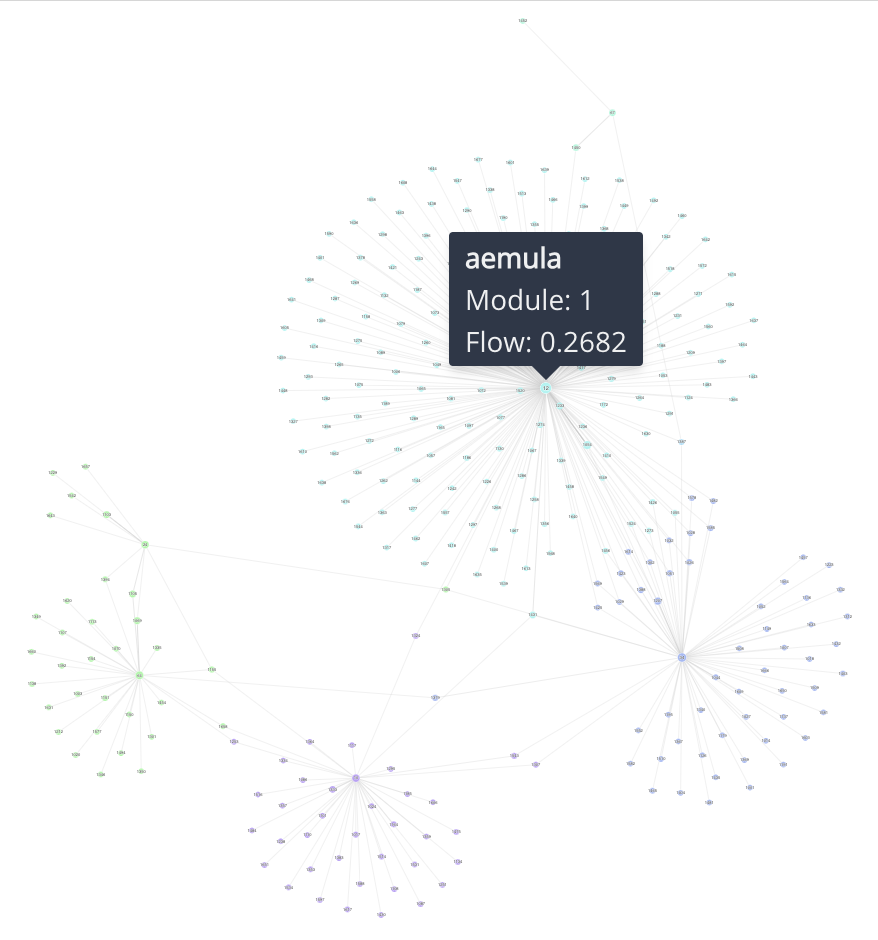

In [7]:
Image(filename="/Users/melikakeshavarz/Desktop/20_thr.png")


# Create unipartite with the bipartite :

by adding this flag `--skip-adjust-bipartite-flow`, we get a unipartite network from the bipartite network above (without threshold).

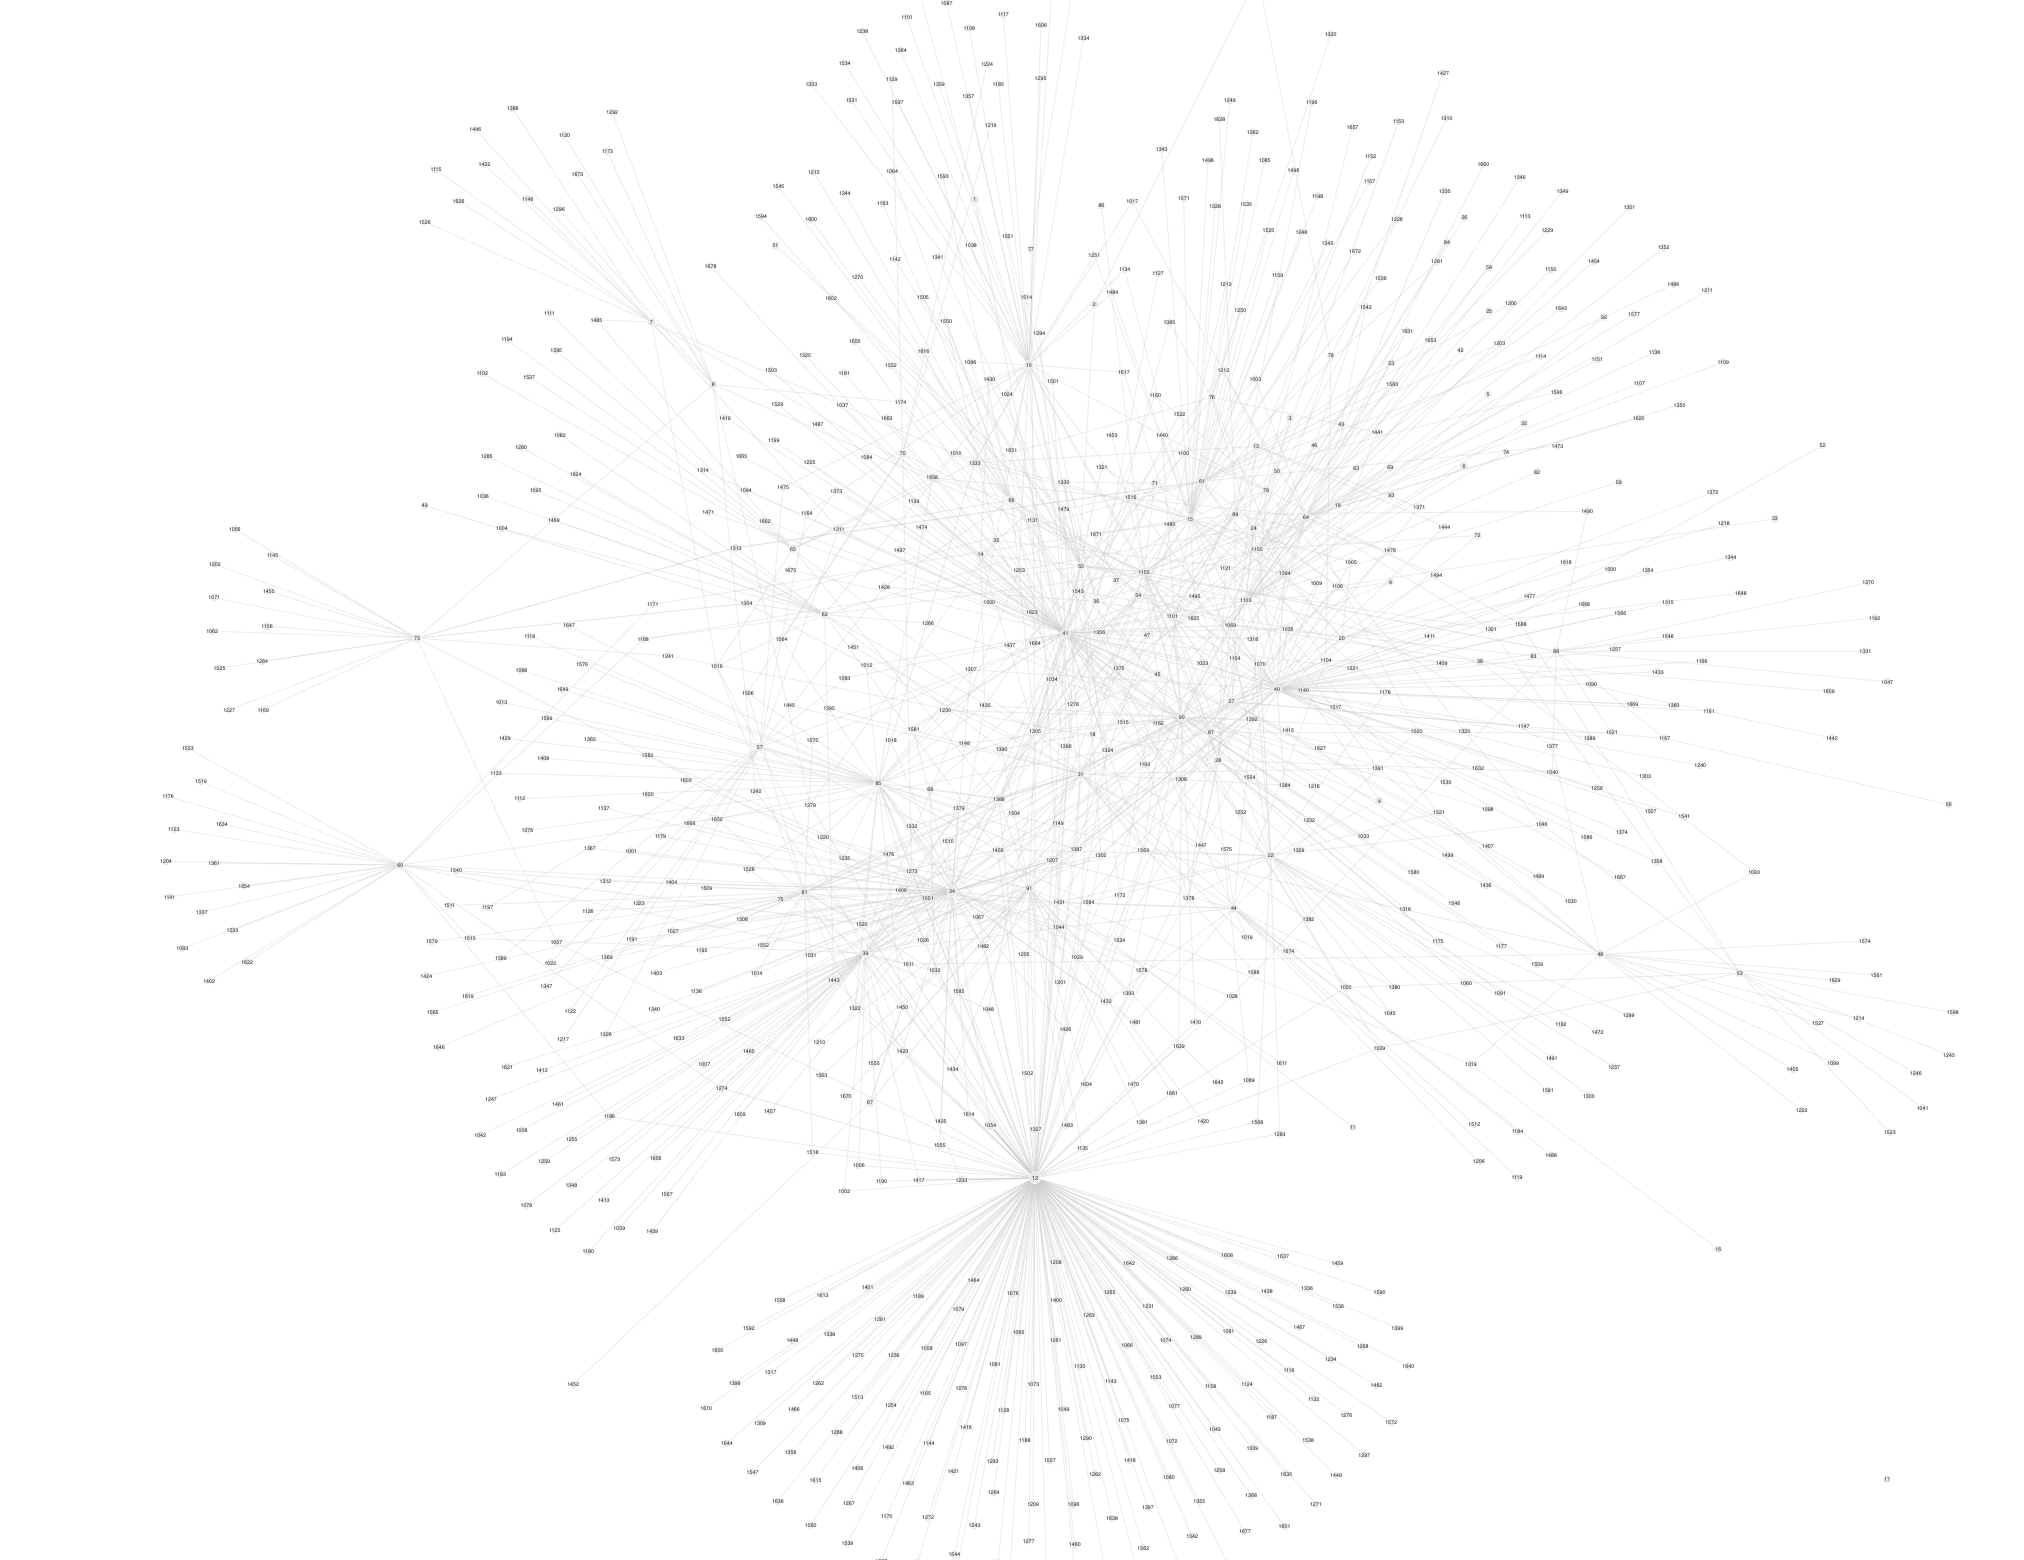

In [8]:
Image(filename="/Users/melikakeshavarz/Desktop/Unipartite.png")

# data analysis of bipartite and unipartite:

##### The bipartite run:

In [5]:
! infomap /Users/melikakeshavarz/Desktop/INFO/output.txt /Users/melikakeshavarz/Desktop/INFO/result/  --clu --ftree

  Infomap v2.7.1 starts at 2023-08-05 17:36:58
  -> Input network: /Users/melikakeshavarz/Desktop/INFO/output.txt
  -> Output path:   /Users/melikakeshavarz/Desktop/INFO/result/
  -> Configuration: ftree
                    clu
Parsing undirected network from file '/Users/melikakeshavarz/Desktop/INFO/output.txt'...
  Parsing vertices...
  -> 772 physical nodes added

 --> Notice: Links marked as directed but parsed as undirected.
  Parsing links...
  -> 1206 links
Done!
-------------------------------------
  -> 772 nodes
  -> 1206 links with total weight 2392
  -> Ordinary network input, using the Map Equation for first order network flows
Calculating global network flow using flow model 'undirected'... 
  -> Using undirected links.
  => Sum node flow: 1, sum link flow: 1
Build internal network with 772 nodes and 1206 links...
  -> One-level codelength: 7.44077023

Trial 1/1 starting at 2023-08-05 17:36:58
Two-level compression: 27% 0.1% 
Partitioned to codelength 1.40806276 + 3.98888

##### The unipartite run:

In [9]:
! infomap /Users/melikakeshavarz/Desktop/INFO/output.txt /Users/melikakeshavarz/Desktop/INFO/result/  --skip-adjust-bipartite-flow

  Infomap v2.7.1 starts at 2023-08-05 21:32:13
  -> Input network: /Users/melikakeshavarz/Desktop/INFO/output.txt
  -> Output path:   /Users/melikakeshavarz/Desktop/INFO/result/
  -> Configuration: skip-adjust-bipartite-flow
Parsing undirected network from file '/Users/melikakeshavarz/Desktop/INFO/output.txt'...
  Parsing vertices...
  -> 772 physical nodes added

 --> Notice: Links marked as directed but parsed as undirected.
  Parsing links...
  -> 1206 links
Done!
-------------------------------------
  -> 772 nodes
  -> 1206 links with total weight 2392
  -> Ordinary network input, using the Map Equation for first order network flows
Calculating global network flow using flow model 'undirected'... 
  -> Using undirected links.
  => Sum node flow: 1, sum link flow: 1
Build internal network with 772 nodes and 1206 links...
  -> One-level codelength: 7.44077023

Trial 1/1 starting at 2023-08-05 21:32:13
Two-level compression: 27% 0.1% 
Partitioned to codelength 1.40806276 + 3.98888026